# Modeling Exercises

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import wrangle

from pydataset import data
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Do your work for this exercise in a notebook named modeling within your clustering-exercises repository.

1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

a) Choose features other than the ones used in the lesson.\
b) Visualize the results of your clustering.\
c) Use the elbow method to visually select a good value for k.\
d) Repeat the clustering, this time with 3 different features.

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

### Wrangle

In [2]:
# acquire dataset
df = data('iris')

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
df = df.rename(columns={"Petal.Width": "petal_width",
                        "Sepal.Width": "sepal_width",
                        "Petal.Length": "petal_length",
                        "Sepal.Length": "sepal_length"
                       })

In [5]:
# let's keep it simple and play around with only two features for simplicity
X = df[['petal_width', 'sepal_width']]
X.head()

,petal_width,sepal_width
1,0.2,3.5
2,0.2,3.0
3,0.2,3.2
4,0.2,3.1
5,0.2,3.6


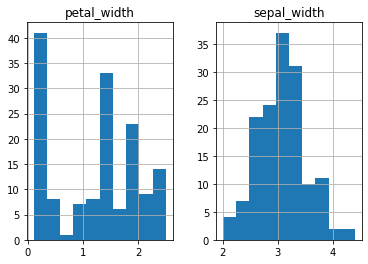

In [6]:
X.hist();

#### Scale

In [7]:
# use standard scaler on train set data ONLY
scaler = StandardScaler().fit(X)

# convert array from scaled data into a dataframe
X_scaled = pd.DataFrame(scaler.transform(X), columns = X.columns).set_index([X.index.values])

In [8]:
X_scaled.head()

,petal_width,sepal_width
1,-1.315444,1.019004
2,-1.315444,-0.131979
3,-1.315444,0.328414
4,-1.315444,0.098217
5,-1.315444,1.249201


#### Using KMeans

In [9]:
# sklearn implementation of KMeans

#define 
kmeans = KMeans(n_clusters=3, random_state = 123)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

In [10]:
# make a new column named cluster in the original X df and X_train_scaled dataframe

df['cluster'] = kmeans.predict(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)

In [11]:
X_scaled.head(3)

,petal_width,sepal_width,cluster
1,-1.315444,1.019004,0
2,-1.315444,-0.131979,0
3,-1.315444,0.328414,0


In [12]:
# cluster centers aka centroids. 

# output is scaled
kmeans.cluster_centers_

array([[-1.25634413,  0.90625492],
       [ 0.22991755, -1.00672719],
       [ 0.98166637,  0.11627194]])

In [13]:
# make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,petal_width,sepal_width
0,-1.256344,0.906255
1,0.229918,-1.006727
2,0.981666,0.116272


In [14]:
# Centriods for unscaled data?
centroids = df.groupby('cluster')['sepal_width', 'petal_width'].mean()
centroids

,sepal_width,petal_width
cluster,,
0,3.451020,0.244898
1,2.620000,1.374000
2,3.107843,1.945098


In [16]:
# Another way to get unscaled centroids?

scaler.inverse_transform(kmeans.cluster_centers_)

array([[0.24489796, 3.45102041],
       [1.374     , 2.62      ],
       [1.94509804, 3.10784314]])

In [25]:
# labels (same as from predict)

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2], dtype=int32)

#### Visualize

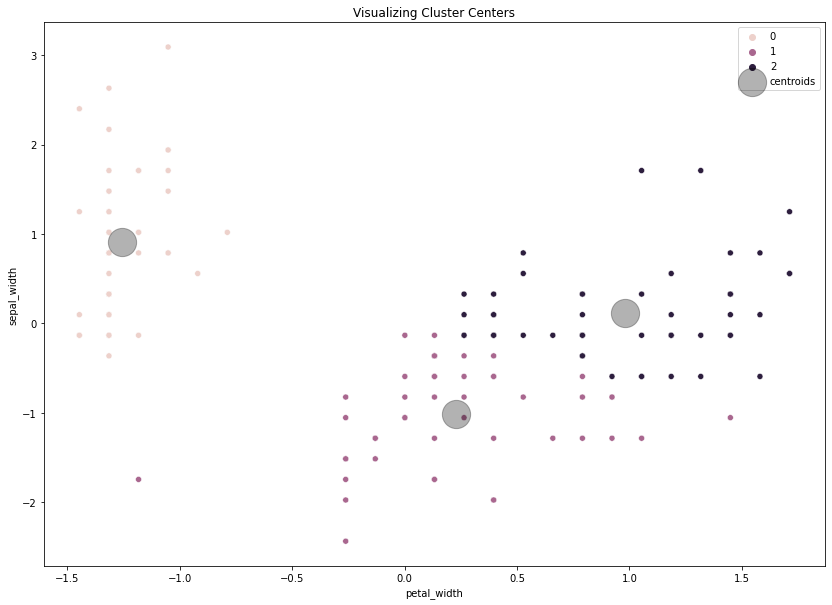

In [22]:
# visualize the clusters along with the centers on scaled data.

plt.figure(figsize=(14, 10))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y ='sepal_width', data = X_scaled, hue = 'cluster')

# plot cluster centers (centroids)
centroids_scaled.plot.scatter(x = 'petal_width', y = 'sepal_width',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')

plt.title('Visualizing Cluster Centers')
plt.legend();

In [23]:
# to avoid sns 'hue' issue with integers, change the cluster columns from integer to string
df['cluster'] = 'cluster_' + df.cluster.astype(str)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species,cluster
1,5.1,3.5,1.4,0.2,setosa,cluster_0
2,4.9,3.0,1.4,0.2,setosa,cluster_0
3,4.7,3.2,1.3,0.2,setosa,cluster_0
4,4.6,3.1,1.5,0.2,setosa,cluster_0
5,5.0,3.6,1.4,0.2,setosa,cluster_0


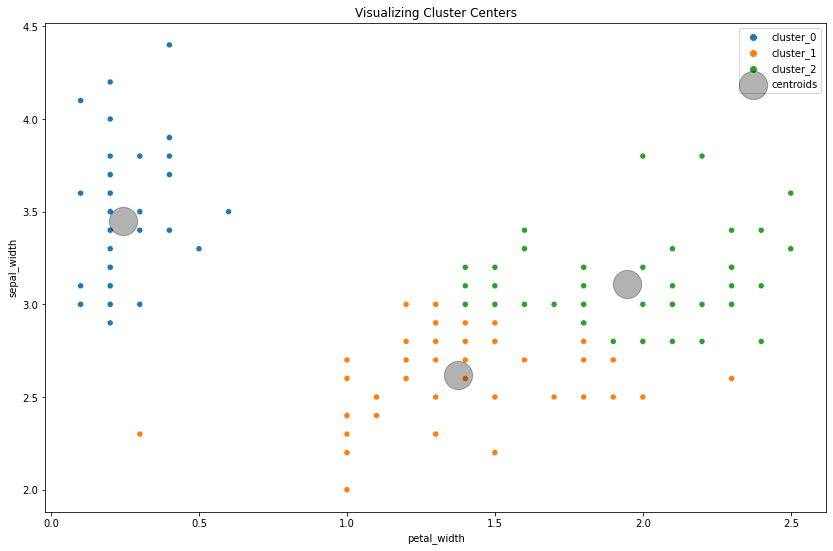

In [24]:
# lets visualize the clusters along with the centers on unscaled data
plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'petal_width', y ='sepal_width', data = df, hue = 'cluster')


# plot cluster centers (centroids)
centroids.plot.scatter(x = 'petal_width', y = 'sepal_width',
                             ax = plt.gca(),
                             s= 800,
                             color = 'k',
                             alpha = 0.3,
                             label = 'centroids')
plt.title('Visualizing Cluster Centers')
plt.legend();

<AxesSubplot:xlabel='petal_width', ylabel='sepal_width'>

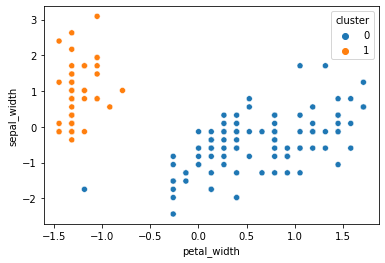

In [26]:
# try again with two clusters
scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])


# lets look at two clusters (i.e k = 2)

kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
X_scaled['cluster'] = kmeans.predict(X_scaled)
sns.scatterplot(x='petal_width', y='sepal_width', data = X_scaled, hue = 'cluster')

#### Elbow Method to find K (intertia)

In [28]:
# set my dataset
X = df[['petal_width', 'sepal_width']]

# define
scaler = StandardScaler().fit(X)

# change array to dataframe and transform
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

k =2 

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

125.36847212365322

In [29]:
# interia with k = 3
k = 3

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

79.23725838536699

In [30]:
# interia with k = 4

k = 4

kmeans = KMeans(n_clusters= k)
kmeans.fit(X_scaled)
kmeans.inertia_

59.19449545317445

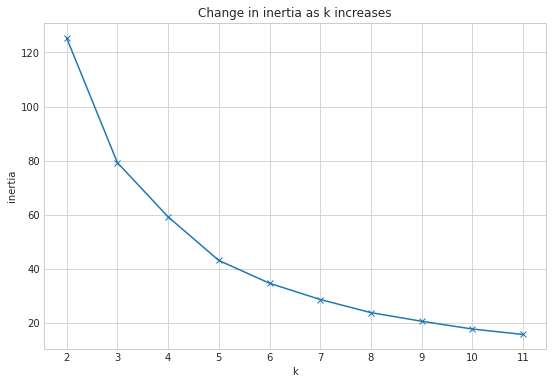

In [31]:
# plot inertia vs k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

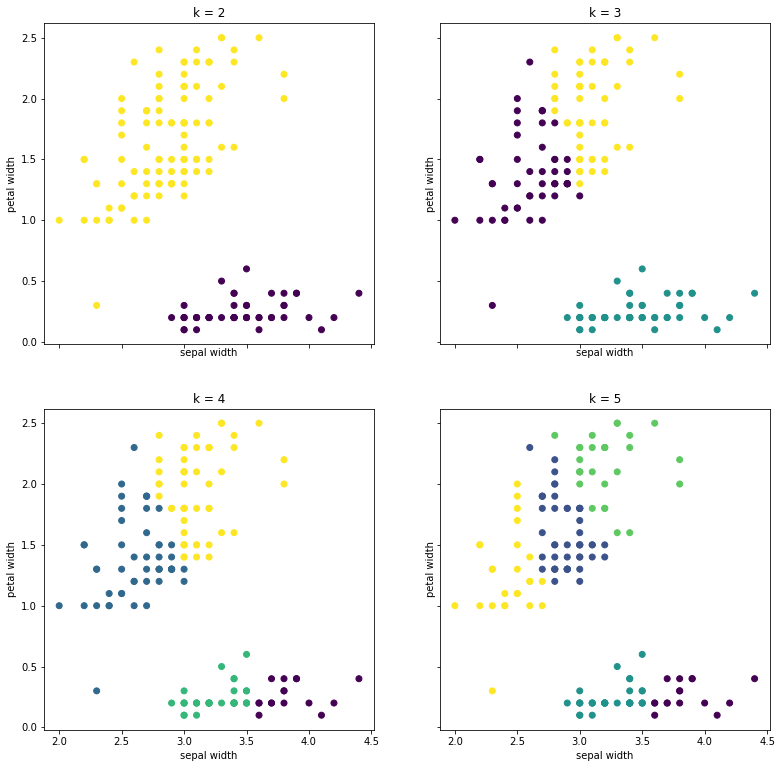

In [33]:
# What value of k is appropriate?


fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_scaled).predict(X_scaled)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal width', ylabel='petal width')